In [25]:
from pycocotools.coco import COCO
#import matplotlib; matplotlib.use('TkAgg')
import matplotlib 
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 
import os
import numpy as np
import random

In [26]:
cocoRoot = "./coco/train"
annName = "annotations"
annPath = os.path.join(cocoRoot,'{}.json'.format(annName))
print('annotation file:{}'.format(annPath))

annotation file:./coco/train/annotations.json


In [27]:
coco = COCO(annPath)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [28]:
ids = coco.getCatIds("desk")[0]
print("desk:{}".format(ids))

desk:1


In [29]:
imgIds = coco.getImgIds(catIds=[1])
print(f'there are {len(imgIds)} desk photos included in dataset')

there are 10 desk photos included in dataset


In [30]:
id = coco.getCatIds(['desk'])[0]
# map catId to imgId
imgIds = list(set(coco.catToImgs[id]))
print(f'the img contain a dog is:')
print(imgIds)

the img contain a dog is:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


{'license': 0, 'url': None, 'file_name': 'JPEGImages/1.jpg', 'height': 405, 'width': 720, 'date_captured': None, 'id': 0}
./coco/train/JPEGImages/1.jpg


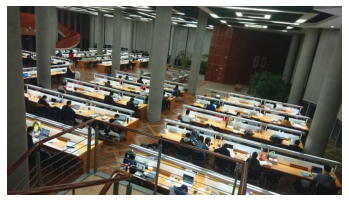

In [31]:
imgId = imgIds[0]
imgInfo = coco.loadImgs(imgId)[0]
#get the info of img
print(imgInfo)
imPath = os.path.join(cocoRoot,imgInfo['file_name'])
print(imPath)
im = cv2.imread(imPath)
#rgb -> bgr
im = im[:,:,(2,1,0)]
plt.imshow(im);plt.axis('off')
plt.show()

img 0 include 9 ann class, they are[0, 1, 2, 3, 4, 5, 6, 7, 8]


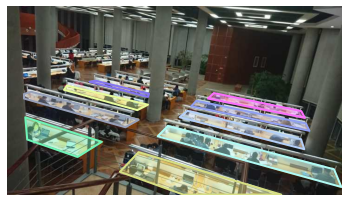

In [32]:
plt.imshow(im); plt.axis('off')

annIds = coco.getAnnIds(imgIds=imgInfo['id'])
anns = coco.loadAnns(annIds)
            
print(f'img {imgInfo["id"]} include {len(anns)} ann class, they are{annIds}')
coco.showAnns(anns)

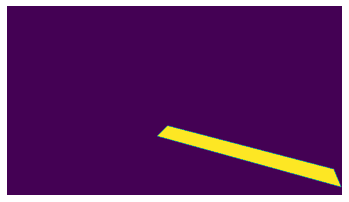

In [33]:
mask = coco.annToMask(anns[0])

plt.imshow(mask)
plt.axis('off')
plt.show()

In [34]:
coco.getImgIds()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
coco.getCatIds()

[1]

In [36]:
coco.loadCats(1)

[{'supercategory': None, 'id': 1, 'name': 'desk'}]

In [37]:
coco.loadAnns()

[]

In [38]:
import sys
ROOT_DIR = '../'
sys.path.append(ROOT_DIR) 

In [39]:
import desk

In [40]:
cfg = desk.Config()
dataset = desk.DeskDataset()

In [41]:
dataset.load_desk()

the annotation file is here:./coco/train/annotations.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [42]:
dataset.prepare()

In [43]:
dataset.class_from_source_map

{'.0': 0, 'desks.1': 1}

In [47]:
dataset.class_info

[{'source': '', 'id': 0, 'name': 'BG'},
 {'source': 'desks', 'id': 1, 'name': 'desk'}]

In [46]:
dataset.map_source_class_id('desks.1')

[{'source': '', 'id': 0, 'name': 'BG'},
 {'source': 'desks', 'id': 1, 'name': 'desk'}]

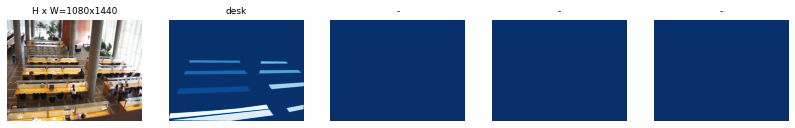

In [45]:
from mrcnn import visualize
from mrcnn.visualize import display_images
image_id = 3

image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset.class_names)